# Show clustering and denoising

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

(1797, 64)
(1797, 2)


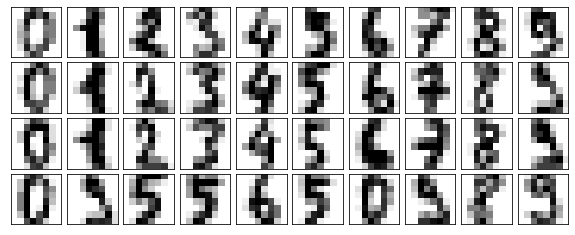

In [3]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plot_digits(digits.data)

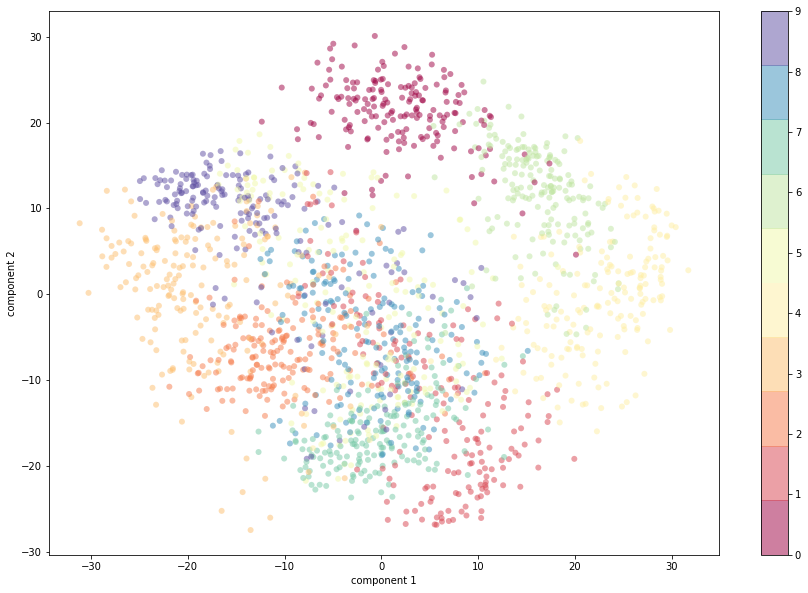

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

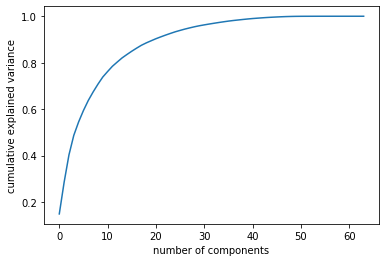

In [5]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

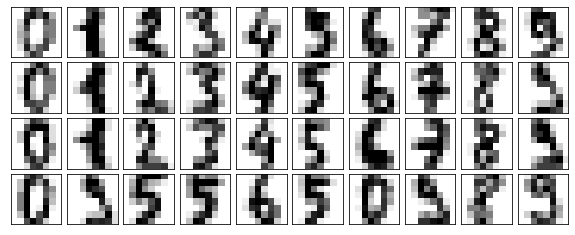

In [6]:
plot_digits(digits.data)

# Add noise to the original data

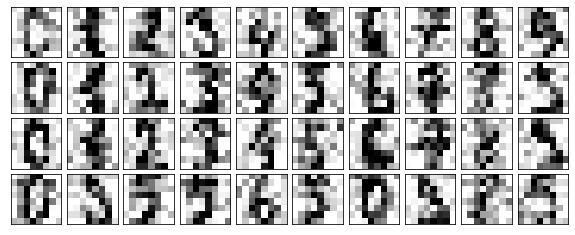

In [7]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

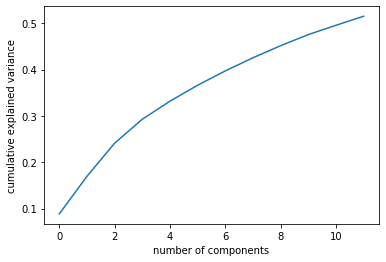

In [8]:
pca = PCA(0.50).fit(noisy) # 50% of the variance amounts to 12 principal components.
pca.n_components_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

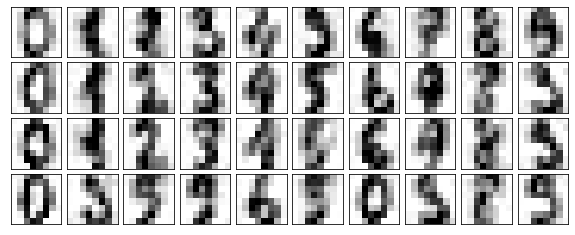

In [9]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)